In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [63]:
df=pd.read_csv("Flirt_predict.csv")

In [64]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,TEXT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LABEL
1,"1. ""Is your name Google? Because you have ever...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,"2. ""Do you believe in love at first sight, or ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,"3. ""Are you a parking ticket? Because you've g...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,"4. ""I seem to have lost my phone number. Can I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
96,"96. ""I'm trying to find a good restaurant."" (N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
97,"97. ""Can you give me directions?"" (Not Flirt)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
98,"98. ""What's the history of this building?"" (No...",Generate Audio Overview,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
99,"99. ""I need to return this book to the library...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [65]:
print(df.isnull().sum()) 

Unnamed: 0      0
Unnamed: 1    100
Unnamed: 2    101
Unnamed: 3    101
Unnamed: 4    101
Unnamed: 5    101
Unnamed: 6    101
Unnamed: 7    101
Unnamed: 8    101
Unnamed: 9      0
dtype: int64


In [88]:
print(df.columns.tolist())


['TEXT', 'LABEL']


In [93]:
df.columns = df.columns.str.strip()


In [95]:
texts = df.iloc[1:, 0]   # First column
labels = df.iloc[1:, -1] # Last column


In [96]:
import pandas as pd

# Load file
df = pd.read_csv("Flirt_predict.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Extract and clean data
texts = df.iloc[1:, 0].str.replace(r'^\d+\.\s*', '', regex=True)
labels = df.iloc[1:, -1].astype(int)

# Create cleaned DataFrame
df_cleaned = pd.DataFrame({
    'text': texts,
    'label': labels
}).reset_index(drop=True)

print(df_cleaned.head())


                                                text  label
0  "Is your name Google? Because you have everyth...      1
1  "Do you believe in love at first sight, or sho...      1
2  "Are you a parking ticket? Because you've got ...      1
3  "I seem to have lost my phone number. Can I ha...      1
4  "If you were a vegetable, you'd be a cute-cumb...      1


In [100]:
# Number of samples
print("Total samples:", len(df_cleaned))

# Class distribution
print("\nLabel distribution:")
print(df_cleaned['label'].value_counts())

# Check for missing values
print("\nMissing values:\n", df_cleaned.isnull().sum())


Total samples: 100

Label distribution:
label
1    50
0    50
Name: count, dtype: int64

Missing values:
 text     0
label    0
dtype: int64


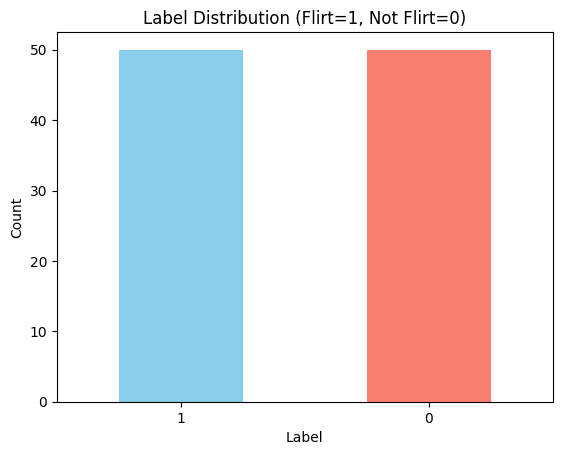

In [101]:
import matplotlib.pyplot as plt

df_cleaned['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Label Distribution (Flirt=1, Not Flirt=0)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split into features and labels
X = df_cleaned['text']
y = df_cleaned['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [110]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.86      0.50      0.63        12

    accuracy                           0.65        20
   macro avg       0.70      0.69      0.65        20
weighted avg       0.73      0.65      0.65        20



In [138]:
import pandas as pd

# Example loading cleaned WhatsApp data

chat_df= pd.read_csv("processed.csv")

# Preview
chat_df.head()


,Date,Time,Name,Text,scores,compound,Negtive,Postive,Neutral,comp_score,Topic
0,10/4/20,9:40 PM,Suganya tn,Is that yoga class good Femi,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...",0.4404,0.0,0.367,0.633,pos,4
1,10/4/20,11:18 PM,Suganya tn,Preksha from jeeva parivardhanam yoga only u ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,4
2,10/5/20,5:31 AM,hameedfemina,89044 91142,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0
3,10/5/20,5:32 AM,hameedfemina,This person name is Shashank,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,4
4,10/5/20,5:32 AM,hameedfemina,He s also one of the organizer,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0


In [141]:
print(chat_df.columns.tolist())


['Date', 'Time', 'Name', 'Text', 'scores', 'compound', 'Negtive', 'Postive', 'Neutral', 'comp_score', 'Topic', 'is_flirty']


In [139]:
# Apply flirt prediction
chat_df['is_flirty'] = nb_model.predict(vectorizer.transform(chat_df['Text']))


<Axes: title={'center': 'Message Count by Sender'}, xlabel='Name', ylabel='Text'>

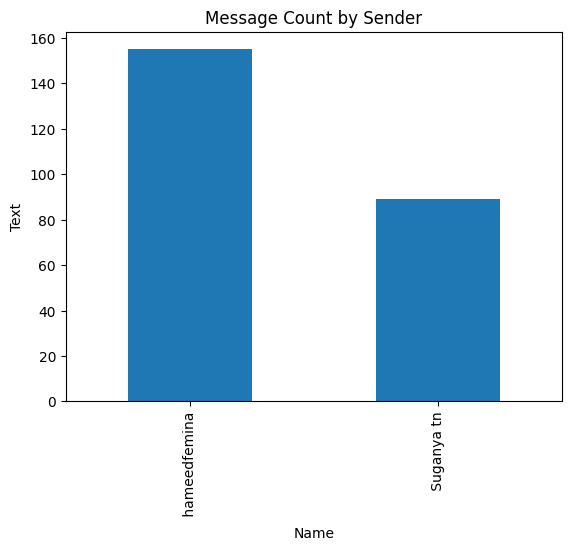

In [127]:
# Talkative vs Less Talkative
msg_counts = chat_df['Name'].value_counts()
msg_counts.plot(kind='bar', title='Message Count by Sender', ylabel='Text')


In [128]:
#Missed Calls
missed_calls = chat_df[chat_df['Text'].str.contains('missed call', case=False, na=False)]
missed_calls


,Date,Time,Name,Text,scores,compound,Negtive,Postive,Neutral,comp_score,Topic,is_flirty


In [129]:
#Media Count per Person
media_df = chat_df[chat_df['Text'].str.contains('Media omitted', na=False)]
media_count = media_df['Name'].value_counts()
media_count


Name
hameedfemina    11
Name: count, dtype: int64

In [145]:
chat_df['datetime'] = pd.to_datetime(chat_df['Date'] + ' ' + chat_df['Time'], errors='coerce')


C:\Users\argka\AppData\Local\Temp\ipykernel_23528\611283891.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chat_df['datetime'] = pd.to_datetime(chat_df['Date'] + ' ' + chat_df['Time'], errors='coerce')


In [144]:
print(chat_df.columns.tolist())

['Date', 'Time', 'Name', 'Text', 'scores', 'compound', 'Negtive', 'Postive', 'Neutral', 'comp_score', 'Topic', 'is_flirty']


In [146]:
chat_df['day'] = chat_df['datetime'].dt.date  # for most active **date**
chat_df['hour'] = chat_df['datetime'].dt.hour  # for most active **hour**


In [147]:
most_active_date = chat_df['day'].value_counts().idxmax()
print("📅 Most Active Date:", most_active_date)


📅 Most Active Date: 2021-05-08


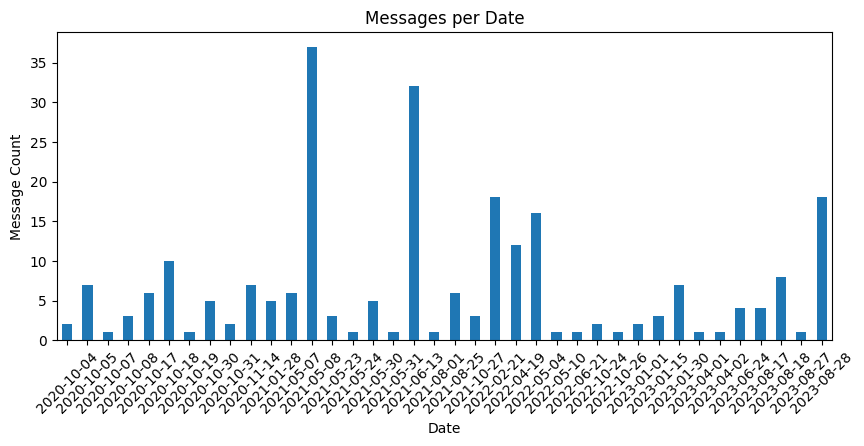

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daily Activity
chat_df['day'].value_counts().sort_index().plot(kind='bar', figsize=(10, 4), title='Messages per Date')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.show()



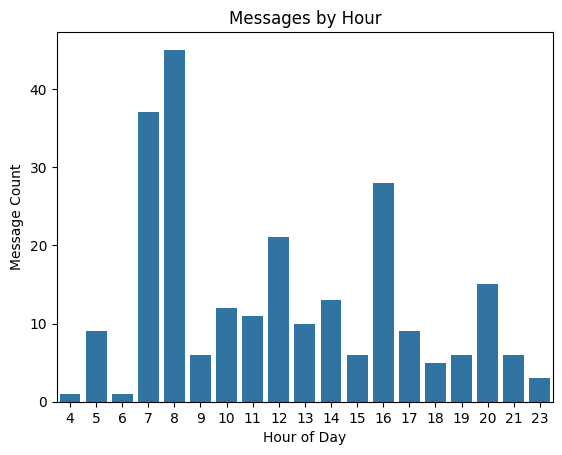

In [152]:
# Hourly Activity
sns.countplot(x='hour', data=chat_df)

plt.title('Messages by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Message Count')
plt.show()